In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("cleaned_preprocessed_dataset.csv")
df.head()


,activitysiteid,activitydescription,bookingenddatetime_(month_/_day_/_year)_apr_may,bookingstarttime_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,bookingstarttime_june,maxbookees_june,number_booked_june,price_(inr)_june
0,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0
1,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-12,10:00:00,35.0,23.0,499.0
2,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-19,10:00:00,35.0,21.0,499.0
3,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-26,10:00:00,35.0,18.0,499.0
4,BRP,20:20:20 10-11 Am,2018-04-10,10:00:00,0.239673,0.891390,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0


In [3]:
# Convert date columns
df["bookingenddatetime_(month_/_day_/_year)_apr_may"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_apr_may"], errors="coerce"
)
df["bookingenddatetime_(month_/_day_/_year)_june"] = pd.to_datetime(
    df["bookingenddatetime_(month_/_day_/_year)_june"], errors="coerce"
)

# Unified columns
df["booking_date"] = df[
    "bookingenddatetime_(month_/_day_/_year)_apr_may"
].combine_first(
    df["bookingenddatetime_(month_/_day_/_year)_june"]
)

df["price"] = df["price_(inr)_apr_may"].combine_first(df["price_(inr)_june"])
df["number_booked"] = df["number_booked_apr_may"].combine_first(df["number_booked_june"])
df["maxbookees"] = df["maxbookees_apr_may"].combine_first(df["maxbookees_june"])

df["attendance_ratio"] = df["number_booked"] / df["maxbookees"]

df = df.dropna(subset=["price", "attendance_ratio"])
df.head()


,activitysiteid,activitydescription,bookingenddatetime_(month_/_day_/_year)_apr_may,bookingstarttime_apr_may,maxbookees_apr_may,number_booked_apr_may,price_(inr)_apr_may,bookingenddatetime_(month_/_day_/_year)_june,bookingstarttime_june,maxbookees_june,number_booked_june,price_(inr)_june,booking_date,price,number_booked,maxbookees,attendance_ratio
0,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0,2018-04-03,-1.731935,1.528272,0.239673,6.376480
1,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-12,10:00:00,35.0,23.0,499.0,2018-04-03,-1.731935,1.528272,0.239673,6.376480
2,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-19,10:00:00,35.0,21.0,499.0,2018-04-03,-1.731935,1.528272,0.239673,6.376480
3,BRP,20:20:20 10-11 Am,2018-04-03,10:00:00,0.239673,1.528272,-1.731935,2018-06-26,10:00:00,35.0,18.0,499.0,2018-04-03,-1.731935,1.528272,0.239673,6.376480
4,BRP,20:20:20 10-11 Am,2018-04-10,10:00:00,0.239673,0.891390,-1.731935,2018-06-05,10:00:00,35.0,25.0,499.0,2018-04-10,-1.731935,0.891390,0.239673,3.719189


In [4]:
def dynamic_price(base_price, attendance_ratio):
    """
    Pricing Rules:
    - High demand (attendance > 80%): +20%
    - Medium demand (50%–80%): +10%
    - Low demand (30%–50%): no change
    - Very low demand (<30%): -15%
    """
    if attendance_ratio >= 0.8:
        return base_price * 1.20
    elif attendance_ratio >= 0.5:
        return base_price * 1.10
    elif attendance_ratio >= 0.3:
        return base_price
    else:
        return base_price * 0.85


In [5]:
df["dynamic_price"] = df.apply(
    lambda x: dynamic_price(x["price"], x["attendance_ratio"]),
    axis=1
)

df[["price", "attendance_ratio", "dynamic_price"]].head()


,price,attendance_ratio,dynamic_price
0,-1.731935,6.376480,-2.078322
1,-1.731935,6.376480,-2.078322
2,-1.731935,6.376480,-2.078322
3,-1.731935,6.376480,-2.078322
4,-1.731935,3.719189,-2.078322


In [6]:
df["original_revenue"] = df["price"] * df["number_booked"]
df["dynamic_revenue"] = df["dynamic_price"] * df["number_booked"]

df[["original_revenue", "dynamic_revenue"]].head()


,original_revenue,dynamic_revenue
0,-2.646866,-3.176240
1,-2.646866,-3.176240
2,-2.646866,-3.176240
3,-2.646866,-3.176240
4,-1.543829,-1.852595


In [7]:
total_original_revenue = df["original_revenue"].sum()
total_dynamic_revenue = df["dynamic_revenue"].sum()

revenue_lift = (
    (total_dynamic_revenue - total_original_revenue)
    / total_original_revenue
) * 100

total_original_revenue, total_dynamic_revenue, revenue_lift


(975752.7255199128, 1039574.052005099, 6.540727462603822)

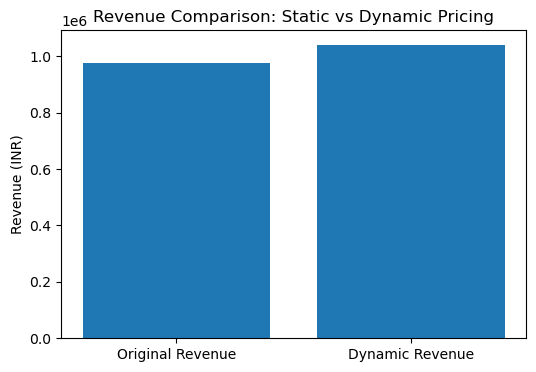

In [8]:
plt.figure(figsize=(6,4))
plt.bar(
    ["Original Revenue", "Dynamic Revenue"],
    [total_original_revenue, total_dynamic_revenue]
)
plt.title("Revenue Comparison: Static vs Dynamic Pricing")
plt.ylabel("Revenue (INR)")
plt.show()
